In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('employees.csv')  #dd-mm-yy or dd-mm-yyy
df.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services


# Getting insights about the data

In [5]:
df.shape,df.size

((1000, 8), 8000)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   First Name         933 non-null    object 
 1   Gender             855 non-null    object 
 2   Start Date         1000 non-null   object 
 3   Last Login Time    1000 non-null   object 
 4   Salary             1000 non-null   int64  
 5   Bonus %            1000 non-null   float64
 6   Senior Management  933 non-null    object 
 7   Team               957 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


In [5]:
df.describe()

,Salary,Bonus %
count,1000.000000,1000.000000
mean,90662.181000,10.207555
std,32923.693342,5.528481
min,35013.000000,1.015000
25%,62613.000000,5.401750
50%,90428.000000,9.838500
75%,118740.250000,14.838000
max,149908.000000,19.944000


In [8]:
# couvert "start date " column to dateline data type
df['Start Date'] = pd.to_datetime(df['Start Date'],format="mixed") # yyyy/mm/dd
df

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,1993-08-06,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,1996-03-31,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,1993-04-23,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,2005-03-04,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1998-01-24,4:47 PM,101004,1.389,True,Client Services
...,...,...,...,...,...,...,...,...
995,Henry,NaN,2014-11-23,6:09 AM,132483,16.655,False,Distribution
996,Phillip,Male,1984-01-31,6:30 AM,42392,19.675,False,Finance
997,Russell,Male,2013-05-20,12:39 PM,96914,1.421,False,Product
998,Larry,Male,2013-04-20,4:45 PM,60500,11.985,False,Business Development


In [11]:
#number of unique elements   # number of colunm(n)
df.nunique()

First Name           200
Gender                 2
Start Date           972
Last Login Time      720
Salary               995
Bonus %              971
Senior Management      2
Team                  10
dtype: int64

# handeling null values

In [4]:
df.isnull().sum()

First Name            67
Gender               145
Start Date             0
Last Login Time        0
Salary                 0
Bonus %                0
Senior Management     67
Team                  43
dtype: int64

In [4]:
df["Gender"].fillna("No Gender",inplace=True)
df.isnull().sum()

First Name           67
Gender                0
Start Date            0
Last Login Time       0
Salary                0
Bonus %               0
Senior Management    67
Team                 43
dtype: int64

In [10]:
mode=df['Senior Management'].mode().values[0]
print(mode)
df['Senior Management']=df['Senior Management'].replace(np.nan,"N/A")
df.isnull().sum()

True


First Name           67
Gender                0
Start Date            0
Last Login Time       0
Salary                0
Bonus %               0
Senior Management     0
Team                 43
dtype: int64

In [15]:
df['Team']=df['Team'].replace(np.nan,"Other values")
df.isnull().sum()

First Name           67
Gender                0
Start Date            0
Last Login Time       0
Salary                0
Bonus %               0
Senior Management     0
Team                  0
dtype: int64

In [11]:
df=df.dropna(axis=0,how='any')
print(df.isnull().sum())
df.shape

First Name           0
Gender               0
Start Date           0
Last Login Time      0
Salary               0
Bonus %              0
Senior Management    0
Team                 0
dtype: int64


(933, 8)

In [12]:
df.duplicated().sum()

0

# Data Visualization

In [13]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt

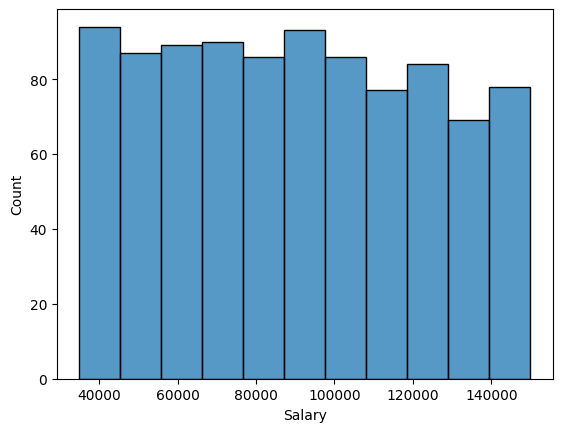

In [19]:
sns.histplot(x='Salary',data=df)
plt.show()

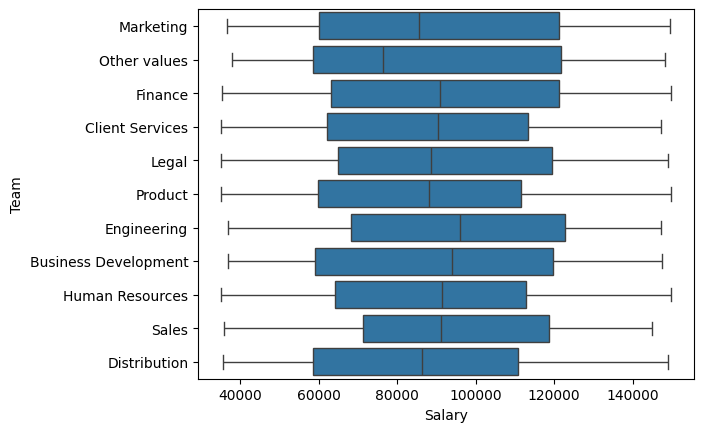

In [20]:
sns.boxplot(x="Salary", y="Team" , data=df)
plt.show()

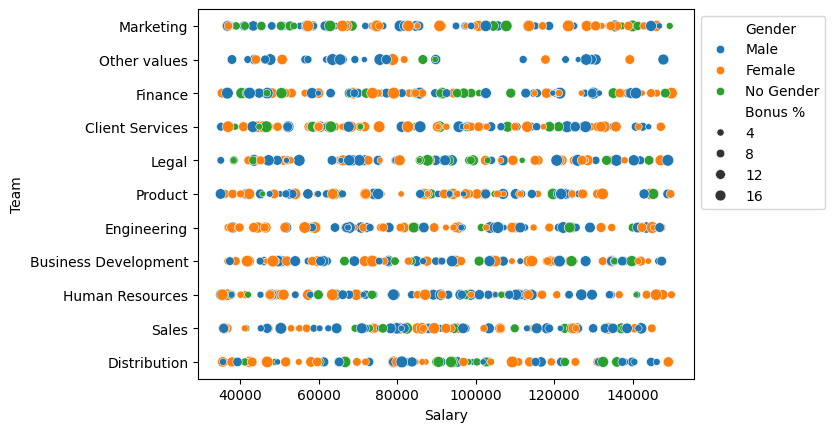

In [21]:
sns.scatterplot(x="Salary",y="Team",hue="Gender",size='Bonus %',data=df)
#placing legend outside the figure
plt.legend(bbox_to_anchor=(1,1))
plt.show()

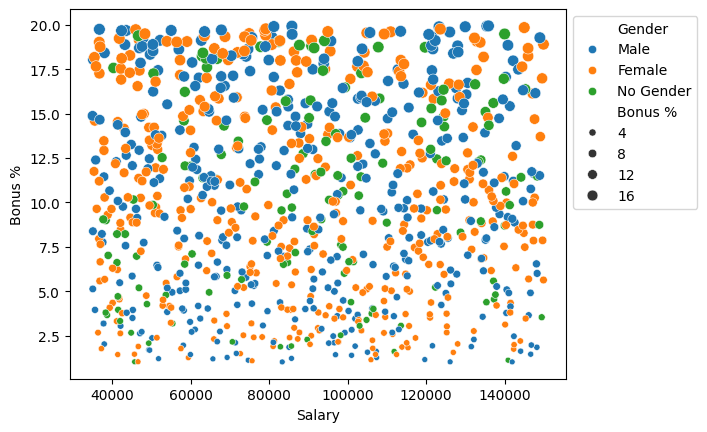

In [23]:
sns.scatterplot(x="Salary",y="Bonus %",hue="Gender",size='Bonus %',data=df)
#placing legend outside the figure
plt.legend(bbox_to_anchor=(1,1))
plt.show()

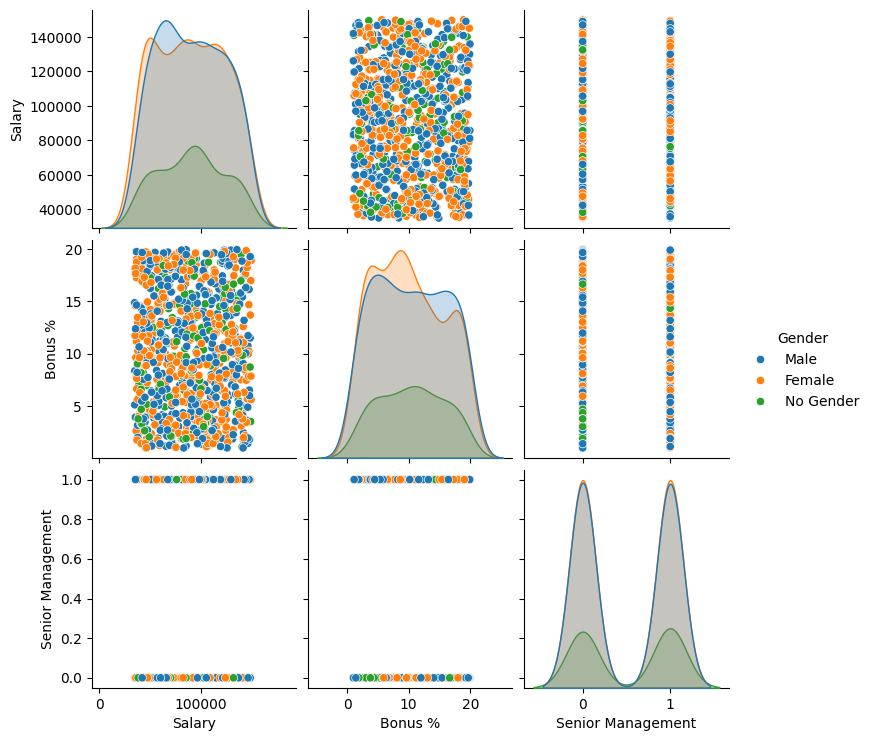

In [26]:
sns.pairplot(df,hue="Gender")
plt.show()

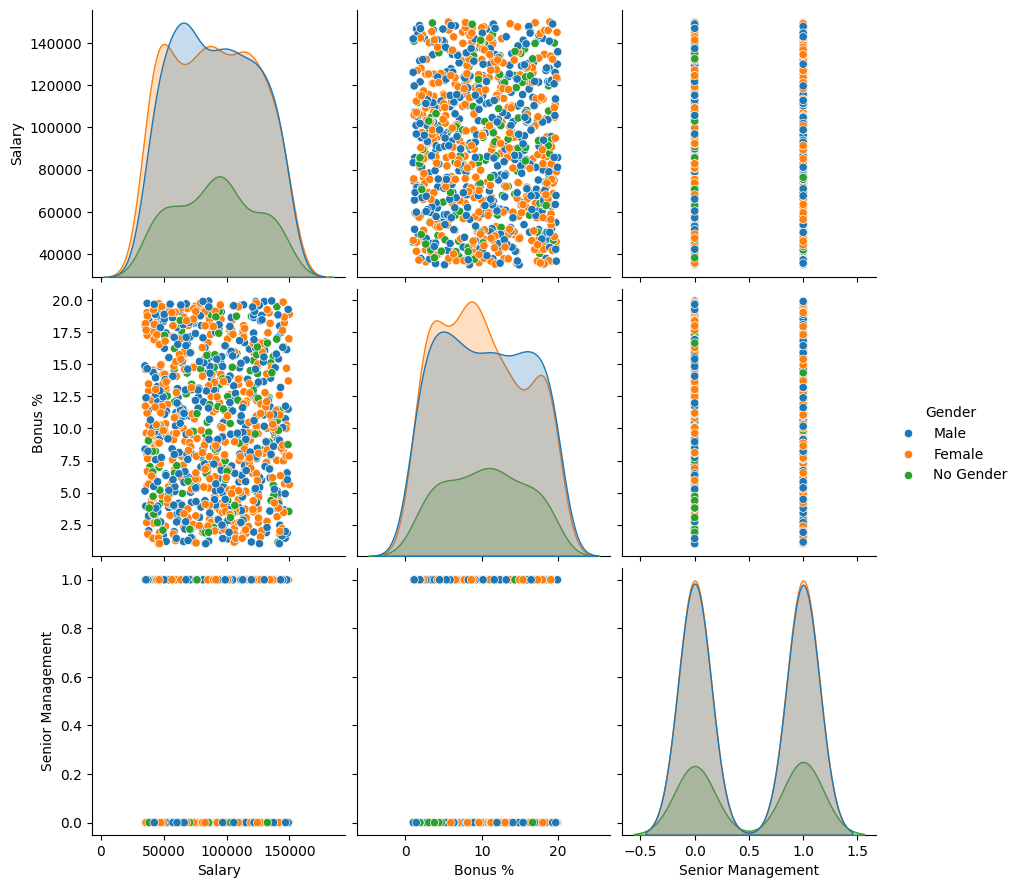

In [32]:
sns.pairplot(df,hue="Gender",height=3)
plt.show()